<a href="https://colab.research.google.com/github/mahfuz978/TECH-I.S.---Unsupervised-Learning/blob/main/PCA/Mahfuzur_principal_component_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
# configure pandas display settings
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# **Load Dataset**
* we'll use the fifa dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Tech-i-s/techis-ds-wiki/master/Step%204-2%20Unsupervised%20Learning/02_Principal%20Component%20Analysis/fifa19.csv?token=AM2M2N7XV64TTLU4677G4OLAQVHXW')
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [5]:
df.shape

(18207, 89)

In [6]:
df_numerical_features = [col for col in df.columns if df[col].dtype == 'float64']
df_numerical_features

['International Reputation',
 'Weak Foot',
 'Skill Moves',
 'Jersey Number',
 'Crossing',
 'Finishing',
 'HeadingAccuracy',
 'ShortPassing',
 'Volleys',
 'Dribbling',
 'Curve',
 'FKAccuracy',
 'LongPassing',
 'BallControl',
 'Acceleration',
 'SprintSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'ShotPower',
 'Jumping',
 'Stamina',
 'Strength',
 'LongShots',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Marking',
 'StandingTackle',
 'SlidingTackle',
 'GKDiving',
 'GKHandling',
 'GKKicking',
 'GKPositioning',
 'GKReflexes']

In [7]:
# drop the column names which dont make sense
df_numerical_features.remove('International Reputation')

In [8]:
# chaeck after removing the column label
df_numerical_features

['Weak Foot',
 'Skill Moves',
 'Jersey Number',
 'Crossing',
 'Finishing',
 'HeadingAccuracy',
 'ShortPassing',
 'Volleys',
 'Dribbling',
 'Curve',
 'FKAccuracy',
 'LongPassing',
 'BallControl',
 'Acceleration',
 'SprintSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'ShotPower',
 'Jumping',
 'Stamina',
 'Strength',
 'LongShots',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Marking',
 'StandingTackle',
 'SlidingTackle',
 'GKDiving',
 'GKHandling',
 'GKKicking',
 'GKPositioning',
 'GKReflexes']

In [9]:
df_numerical_features.remove('Jersey Number')

In [10]:
# check after removing the column label
df_numerical_features

['Weak Foot',
 'Skill Moves',
 'Crossing',
 'Finishing',
 'HeadingAccuracy',
 'ShortPassing',
 'Volleys',
 'Dribbling',
 'Curve',
 'FKAccuracy',
 'LongPassing',
 'BallControl',
 'Acceleration',
 'SprintSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'ShotPower',
 'Jumping',
 'Stamina',
 'Strength',
 'LongShots',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Marking',
 'StandingTackle',
 'SlidingTackle',
 'GKDiving',
 'GKHandling',
 'GKKicking',
 'GKPositioning',
 'GKReflexes']

In [11]:
#extract the numerical only dataset
df_numerical = df[df_numerical_features]

In [12]:
df_numerical.head()

,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,4.0,4.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,4.0,5.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,5.0,5.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,3.0,1.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,5.0,4.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [13]:
df_numerical.isnull().sum()

Weak Foot          48
Skill Moves        48
Crossing           48
Finishing          48
HeadingAccuracy    48
ShortPassing       48
Volleys            48
Dribbling          48
Curve              48
FKAccuracy         48
LongPassing        48
BallControl        48
Acceleration       48
SprintSpeed        48
Agility            48
Reactions          48
Balance            48
ShotPower          48
Jumping            48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
Composure          48
Marking            48
StandingTackle     48
SlidingTackle      48
GKDiving           48
GKHandling         48
GKKicking          48
GKPositioning      48
GKReflexes         48
dtype: int64

In [14]:
df_num = df_numerical.copy()

In [15]:
# here filling the nan values with the median of that column
for col in df_numerical_features:
    df_num[col] = df_num[col].fillna(df_num[col].median())    

In [16]:
# check to see if it worked
df_num.isnull().sum()

Weak Foot          0
Skill Moves        0
Crossing           0
Finishing          0
HeadingAccuracy    0
ShortPassing       0
Volleys            0
Dribbling          0
Curve              0
FKAccuracy         0
LongPassing        0
BallControl        0
Acceleration       0
SprintSpeed        0
Agility            0
Reactions          0
Balance            0
ShotPower          0
Jumping            0
Stamina            0
Strength           0
LongShots          0
Aggression         0
Interceptions      0
Positioning        0
Vision             0
Penalties          0
Composure          0
Marking            0
StandingTackle     0
SlidingTackle      0
GKDiving           0
GKHandling         0
GKKicking          0
GKPositioning      0
GKReflexes         0
dtype: int64

In [17]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(df_num)

MinMaxScaler()

In [18]:
# get scaled data
df_scaled = pd.DataFrame(mms.transform(df_num))

df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,0.75,0.75,0.897727,1.000000,0.733333,0.965116,0.953488,1.000000,0.988636,1.000000,0.928571,1.000000,0.929412,0.880952,0.939024,0.986667,0.9875,0.892473,0.6625,0.714286,0.5250,1.000000,0.440476,0.213483,0.989247,1.000000,0.804598,1.000000,0.329670,0.285714,0.261364,0.056180,0.109890,0.155556,0.146067,0.075269
1,0.75,1.00,0.897727,0.989247,0.944444,0.860465,0.965116,0.903226,0.852273,0.802198,0.809524,0.978022,0.905882,0.940476,0.890244,1.000000,0.6750,1.000000,1.0000,0.904762,0.7750,0.989011,0.619048,0.292135,1.000000,0.857143,0.919540,0.989247,0.274725,0.318681,0.227273,0.067416,0.109890,0.155556,0.146067,0.107527
2,1.00,1.00,0.840909,0.913978,0.644444,0.895349,0.930233,0.989247,0.931818,0.923077,0.821429,0.989011,0.964706,0.928571,1.000000,0.973333,0.8500,0.838710,0.5750,0.821429,0.4000,0.868132,0.535714,0.370787,0.935484,0.916667,0.873563,0.978495,0.263736,0.241758,0.340909,0.089888,0.087912,0.155556,0.157303,0.107527
3,0.50,0.00,0.136364,0.118280,0.188889,0.500000,0.104651,0.150538,0.170455,0.175824,0.500000,0.406593,0.529412,0.547619,0.560976,0.920000,0.3375,0.311828,0.6500,0.369048,0.5875,0.098901,0.321429,0.303371,0.107527,0.690476,0.402299,0.698925,0.131868,0.208791,0.113636,1.000000,0.923077,0.955556,0.977528,1.000000
4,1.00,0.75,1.000000,0.860215,0.566667,0.988372,0.906977,0.881720,0.897727,0.879121,0.976190,0.945055,0.776471,0.761905,0.792683,0.933333,0.7625,0.956989,0.6000,0.928571,0.7250,0.967033,0.773810,0.651685,0.913978,1.000000,0.850575,0.913978,0.714286,0.615385,0.545455,0.157303,0.131868,0.044444,0.101124,0.129032


In [19]:
# assign column labels
df_scaled.columns = df_numerical_features

In [20]:
df_scaled.head()

,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,0.75,0.75,0.897727,1.000000,0.733333,0.965116,0.953488,1.000000,0.988636,1.000000,0.928571,1.000000,0.929412,0.880952,0.939024,0.986667,0.9875,0.892473,0.6625,0.714286,0.5250,1.000000,0.440476,0.213483,0.989247,1.000000,0.804598,1.000000,0.329670,0.285714,0.261364,0.056180,0.109890,0.155556,0.146067,0.075269
1,0.75,1.00,0.897727,0.989247,0.944444,0.860465,0.965116,0.903226,0.852273,0.802198,0.809524,0.978022,0.905882,0.940476,0.890244,1.000000,0.6750,1.000000,1.0000,0.904762,0.7750,0.989011,0.619048,0.292135,1.000000,0.857143,0.919540,0.989247,0.274725,0.318681,0.227273,0.067416,0.109890,0.155556,0.146067,0.107527
2,1.00,1.00,0.840909,0.913978,0.644444,0.895349,0.930233,0.989247,0.931818,0.923077,0.821429,0.989011,0.964706,0.928571,1.000000,0.973333,0.8500,0.838710,0.5750,0.821429,0.4000,0.868132,0.535714,0.370787,0.935484,0.916667,0.873563,0.978495,0.263736,0.241758,0.340909,0.089888,0.087912,0.155556,0.157303,0.107527
3,0.50,0.00,0.136364,0.118280,0.188889,0.500000,0.104651,0.150538,0.170455,0.175824,0.500000,0.406593,0.529412,0.547619,0.560976,0.920000,0.3375,0.311828,0.6500,0.369048,0.5875,0.098901,0.321429,0.303371,0.107527,0.690476,0.402299,0.698925,0.131868,0.208791,0.113636,1.000000,0.923077,0.955556,0.977528,1.000000
4,1.00,0.75,1.000000,0.860215,0.566667,0.988372,0.906977,0.881720,0.897727,0.879121,0.976190,0.945055,0.776471,0.761905,0.792683,0.933333,0.7625,0.956989,0.6000,0.928571,0.7250,0.967033,0.773810,0.651685,0.913978,1.000000,0.850575,0.913978,0.714286,0.615385,0.545455,0.157303,0.131868,0.044444,0.101124,0.129032


In [21]:
df_scaled.describe()

,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000
mean,0.486859,0.340089,0.508471,0.468387,0.536754,0.601110,0.452464,0.552536,0.467875,0.438003,0.520483,0.586612,0.619063,0.627773,0.603783,0.544494,0.599649,0.574940,0.626148,0.609849,0.603955,0.484838,0.534253,0.491149,0.515825,0.516728,0.500572,0.598407,0.486777,0.502386,0.484979,0.175297,0.168982,0.169092,0.172749,0.168772
std,0.164898,0.188848,0.208427,0.209687,0.192867,0.170710,0.205479,0.203093,0.208762,0.191824,0.182245,0.183146,0.175395,0.174180,0.179843,0.119981,0.176474,0.185120,0.147557,0.188981,0.156759,0.211386,0.206498,0.232263,0.209731,0.168196,0.180268,0.122809,0.218465,0.237788,0.241631,0.198588,0.185570,0.183148,0.191174,0.192837
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.250000,0.375000,0.301075,0.455556,0.546512,0.302326,0.483871,0.318182,0.307692,0.404762,0.538462,0.529412,0.535714,0.500000,0.466667,0.500000,0.462366,0.537500,0.523810,0.512500,0.329670,0.392857,0.258427,0.397849,0.404762,0.390805,0.516129,0.296703,0.274725,0.238636,0.078652,0.076923,0.077778,0.078652,0.075269
50%,0.500000,0.250000,0.556818,0.505376,0.577778,0.639535,0.465116,0.612903,0.477273,0.417582,0.559524,0.637363,0.647059,0.654762,0.634146,0.546667,0.625000,0.612903,0.637500,0.642857,0.625000,0.527473,0.571429,0.550562,0.569892,0.535714,0.505747,0.612903,0.549451,0.582418,0.556818,0.112360,0.109890,0.111111,0.112360,0.107527
75%,0.500000,0.500000,0.670455,0.645161,0.666667,0.709302,0.616279,0.688172,0.636364,0.582418,0.654762,0.703297,0.741176,0.750000,0.731707,0.626667,0.725000,0.709677,0.725000,0.738095,0.712500,0.648352,0.690476,0.685393,0.666667,0.642857,0.632184,0.688172,0.670330,0.703297,0.693182,0.146067,0.142857,0.144444,0.146067,0.139785
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
df_scaled.head()

,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,0.75,0.75,0.897727,1.000000,0.733333,0.965116,0.953488,1.000000,0.988636,1.000000,0.928571,1.000000,0.929412,0.880952,0.939024,0.986667,0.9875,0.892473,0.6625,0.714286,0.5250,1.000000,0.440476,0.213483,0.989247,1.000000,0.804598,1.000000,0.329670,0.285714,0.261364,0.056180,0.109890,0.155556,0.146067,0.075269
1,0.75,1.00,0.897727,0.989247,0.944444,0.860465,0.965116,0.903226,0.852273,0.802198,0.809524,0.978022,0.905882,0.940476,0.890244,1.000000,0.6750,1.000000,1.0000,0.904762,0.7750,0.989011,0.619048,0.292135,1.000000,0.857143,0.919540,0.989247,0.274725,0.318681,0.227273,0.067416,0.109890,0.155556,0.146067,0.107527
2,1.00,1.00,0.840909,0.913978,0.644444,0.895349,0.930233,0.989247,0.931818,0.923077,0.821429,0.989011,0.964706,0.928571,1.000000,0.973333,0.8500,0.838710,0.5750,0.821429,0.4000,0.868132,0.535714,0.370787,0.935484,0.916667,0.873563,0.978495,0.263736,0.241758,0.340909,0.089888,0.087912,0.155556,0.157303,0.107527
3,0.50,0.00,0.136364,0.118280,0.188889,0.500000,0.104651,0.150538,0.170455,0.175824,0.500000,0.406593,0.529412,0.547619,0.560976,0.920000,0.3375,0.311828,0.6500,0.369048,0.5875,0.098901,0.321429,0.303371,0.107527,0.690476,0.402299,0.698925,0.131868,0.208791,0.113636,1.000000,0.923077,0.955556,0.977528,1.000000
4,1.00,0.75,1.000000,0.860215,0.566667,0.988372,0.906977,0.881720,0.897727,0.879121,0.976190,0.945055,0.776471,0.761905,0.792683,0.933333,0.7625,0.956989,0.6000,0.928571,0.7250,0.967033,0.773810,0.651685,0.913978,1.000000,0.850575,0.913978,0.714286,0.615385,0.545455,0.157303,0.131868,0.044444,0.101124,0.129032


# **PCA**
* [ref](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)

In [23]:
# import PCA from decomposition 
from sklearn.decomposition import PCA

# create the PCA object to use to fit the given data
pca = PCA()

# fit the PCA with the given dataset
pca.fit(df_scaled)

PCA()

In [24]:
# principal axes in feature space, representing the directions of maximum variance in the data.
print(pca.components_)

[[-6.76303609e-02 -1.78538619e-01 -2.13242226e-01 ...  1.84254795e-01
   1.92461712e-01  1.94981262e-01]
 [-6.78681074e-02 -1.17022774e-01 -3.94981334e-02 ... -5.69692721e-02
  -5.77788772e-02 -5.92048923e-02]
 [ 7.38533088e-02  3.55562740e-02  8.82173004e-02 ...  2.87150586e-01
   3.03454402e-01  3.02854047e-01]
 ...
 [-1.82649205e-03  1.73984168e-03 -2.21827446e-04 ...  2.35882925e-02
  -7.23947260e-01  3.27381320e-01]
 [ 1.63057885e-03  2.62482740e-04 -1.01675472e-02 ... -1.12099410e-01
  -4.31042625e-01 -1.15260462e-01]
 [ 9.83106700e-04  2.29560290e-03 -4.40711920e-04 ... -7.22402046e-02
  -7.86321023e-02  8.02798544e-01]]


In [25]:
# check the shape
print(pca.components_.shape)

(36, 36)


In [26]:
# check the type
print(type(pca.components_))

<class 'numpy.ndarray'>


In [27]:
# Percentage of variance explained by each of the selected components
print(pca.explained_variance_)

[0.72499604 0.22823171 0.07184818 0.05864128 0.03591377 0.02288975
 0.01694403 0.013391   0.01134978 0.01035818 0.01017137 0.00898279
 0.00861548 0.00794792 0.0065739  0.00642479 0.00614736 0.00586742
 0.00545834 0.00536165 0.00472842 0.0044204  0.00420715 0.00383612
 0.00356032 0.00335195 0.00307062 0.00289572 0.00213359 0.00201441
 0.00131531 0.00128844 0.00128301 0.00115702 0.00106321 0.00101269]


In [28]:
print(len(pca.explained_variance_))

36


In [29]:
print(pca.singular_values_)

[114.88811028  64.46073678  36.16722161  32.67450305  25.57041517
  20.41398536  17.56368271  15.61398364  14.37477403  13.73247753
  13.60808145  12.78830422  12.52411106  12.02912784  10.9400343
  10.81525833  10.57917355  10.335481     9.9686745    9.8799857
   9.27822896   8.97094656   8.75188056   8.35705334   8.0510346
   7.81189227   7.47688234   7.26081584   6.23250011   6.0559321
   4.89352742   4.84327861   4.83306732   4.5896314    4.39963681
   4.29384153]


In [30]:
print(pca.mean_)

[0.48685945 0.34008898 0.50847077 0.46838714 0.53675448 0.60110985
 0.45246398 0.55253592 0.46787512 0.43800265 0.52048336 0.58661172
 0.61906313 0.62777333 0.60378279 0.54449388 0.59964917 0.57493957
 0.62614791 0.60984851 0.60395521 0.48483768 0.53425292 0.49114892
 0.51582547 0.51672761 0.50057228 0.59840685 0.48677691 0.50238557
 0.48497893 0.17529682 0.16898222 0.16909186 0.17274934 0.16877238]


In [31]:
print(pca.noise_variance_)

0.0


In [32]:
principal_components = pca.fit_transform(df_scaled)

print(type(principal_components))
print(principal_components.shape)

principal_components_df = pd.DataFrame(principal_components)

<class 'numpy.ndarray'>
(18207, 36)


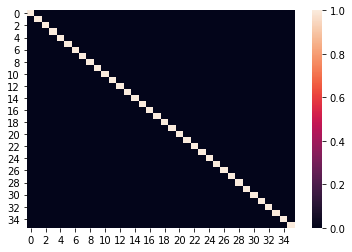

In [33]:
import seaborn as sns
sns.heatmap(principal_components_df.corr());

# **Choosing the Number of Principal Components**

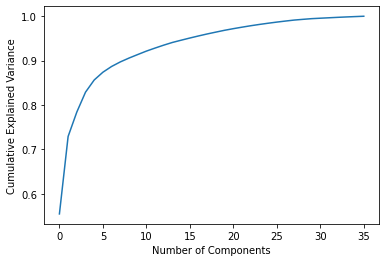

In [34]:
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance');

* This curve quantifies how much of the total, 64-dimensional variance is contained within the first N components.
* For example, we see that with the digits the first 10 components contain approximately 90% of the variance, while you need around 30 components to describe close of 100% of the variance.
* [ref](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.09-Principal-Component-Analysis.ipynb)

# **PCA for Dimensionality Reduction**
- Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components
    - resulting in a lower-dimensional projection of the data that preserves the maximal data variance

In [35]:
pca_low_dim = PCA(n_components = 3)

In [36]:
pca_low_dim.fit(df_scaled)

PCA(n_components=3)

In [37]:
# original components
print(df_scaled.shape)

(18207, 36)


In [38]:
# transformed components
print(pca_low_dim.transform(df_scaled).shape)

(18207, 3)


In [39]:
print(pca_low_dim.explained_variance_)

[0.72499604 0.22823171 0.07184818]


In [40]:
print(pca_low_dim.explained_variance_.sum())

1.0250759303722816
